# Avaliação do Algoritmo Não Supervisionado (K-Means)

Além dos modelos supervisionados, foi aplicado o algoritmo não supervisionado **K-Means** para segmentar os clientes com base em características financeiras padronizadas.

O algoritmo formou três clusters principais, cujas características médias são:

| Característica | Cluster 0 | Cluster 1 | Cluster 2 |
|:---------------|:----------|:----------|:----------|
| Salário Mensal (Monthly_Inhand_Salary) | R$ 2.902 | R$ 2.868 | R$ 6.113 |
| Investimento Mensal (Amount_invested_monthly) | R$ 17.012 | R$ 18.659 | R$ 35.100 |
| Dívida Pendende (Outstanding_Debt) | R$ 6.544 | R$ 5.919 | R$ 6.580 |
| Consultas de Crédito (Num_Credit_Inquiries) | 32 | 27 | 24 |
| Número de Contas Bancárias (Num_Bank_Accounts) | 19 | 20 | 14 |

**Interpretação dos clusters:**
- **Cluster 0 e Cluster 1:** representam clientes de renda mais baixa, com dívidas elevadas e comportamento financeiro moderado. Cluster 1 investe ligeiramente mais do que Cluster 0.
- **Cluster 2:** agrupa clientes com maior capacidade financeira, caracterizados por altos investimentos mensais e salários mais elevados.

A separação dos grupos foi visualizada em gráficos de dispersão, demonstrando padrões distintos de comportamento entre os clusters.

---

# Aplicação dos Clusters em Decisões Financeiras

A segmentação gerada pelo K-Means permite às instituições financeiras:

| Cluster | Ação Estratégica |
|:--------|:-----------------|
| Cluster 0 | Oferecer programas de renegociação de dívida ou crédito assistido. |
| Cluster 1 | Oferecer produtos financeiros básicos e cartões de crédito padrão. |
| Cluster 2 | Focar ofertas premium, como investimentos, seguros sofisticados e crédito de alto valor. |

Essa abordagem possibilita campanhas de marketing mais direcionadas e políticas de crédito personalizadas, reduzindo o risco de inadimplência e aumentando a rentabilidade.

---

# Conclusão Integrada

- **Random Forest** foi o modelo supervisionado que apresentou melhor desempenho preditivo (64% de acurácia).
- **Árvore de Decisão** e **Regressão Logística** mostraram desempenho inferior, principalmente na classificação da classe "Good".
- **K-Means**, como técnica não supervisionada, agregou valor ao revelar três perfis distintos de clientes, o que pode ser utilizado para estratégias de segmentação e análise de risco.

A combinação de métodos supervisionados e não supervisionados amplia a capacidade de tomada de decisão orientada por dados, permitindo tanto a avaliação individual de risco quanto a segmentação estratégica da base de clientes.


# Parte 2: Agrupamento Não Supervisionado utilizando K-Means

In [4]:

# Importação de Bibliotecas
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Carregar uma amostra dos dados (50% dos dados)
train_df = pd.read_csv('train.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)
test_df = pd.read_csv('test.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)



In [5]:
 #Pré-processamento
# Preenchendo valores ausentes com a média
train_df.fillna(train_df.mean(numeric_only=True), inplace=True)
test_df.fillna(test_df.mean(numeric_only=True), inplace=True)

# Identificando variáveis categóricas corretamente
categorical_features = train_df.select_dtypes(include=['object']).columns
categorical_features = [col for col in categorical_features if col != 'Credit_Score']

# Aplicar Label Encoding somente no train_df
le = LabelEncoder()
for col in categorical_features:
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.fit_transform(test_df[col].astype(str))

# Separando Features e Alvo
X = train_df.drop('Credit_Score', axis=1)
y = train_df['Credit_Score']

# Reduzindo número de colunas antes de aplicar K-Means
top_columns = X.std().sort_values(ascending=False).head(300).index
X_reduced = X[top_columns]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


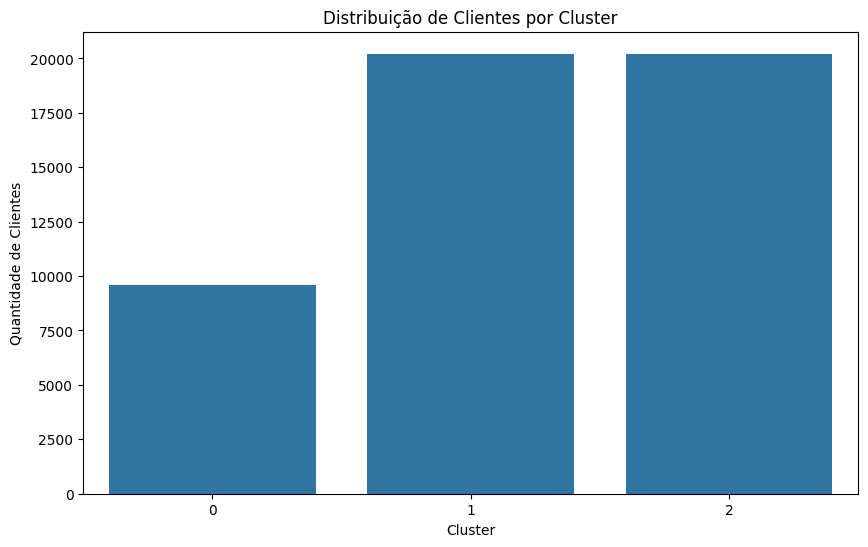

                   ID  Customer_ID     Month         Name         Age  \
Cluster                                                                 
0        24866.249090  6345.438976  3.510665  5592.394756  262.612319   
1        25111.247265  6204.258651  3.525964  5574.140934  288.475323   
2        24984.591887  6180.750829  3.489439  5530.462775  353.604502   

                 SSN  Occupation  Annual_Income  Monthly_Inhand_Salary  \
Cluster                                                                  
0        5899.620643    7.534492    8812.477578            2902.665821   
1        5913.009752    7.459136    7354.965695            2868.313630   
2        5824.318180    7.527925    8300.844620            6113.229815   

         Num_Bank_Accounts  ...  Num_Credit_Inquiries  Credit_Mix  \
Cluster                     ...                                     
0                19.197794  ...             32.738042    0.079804   
1                20.015544  ...             27.184771   

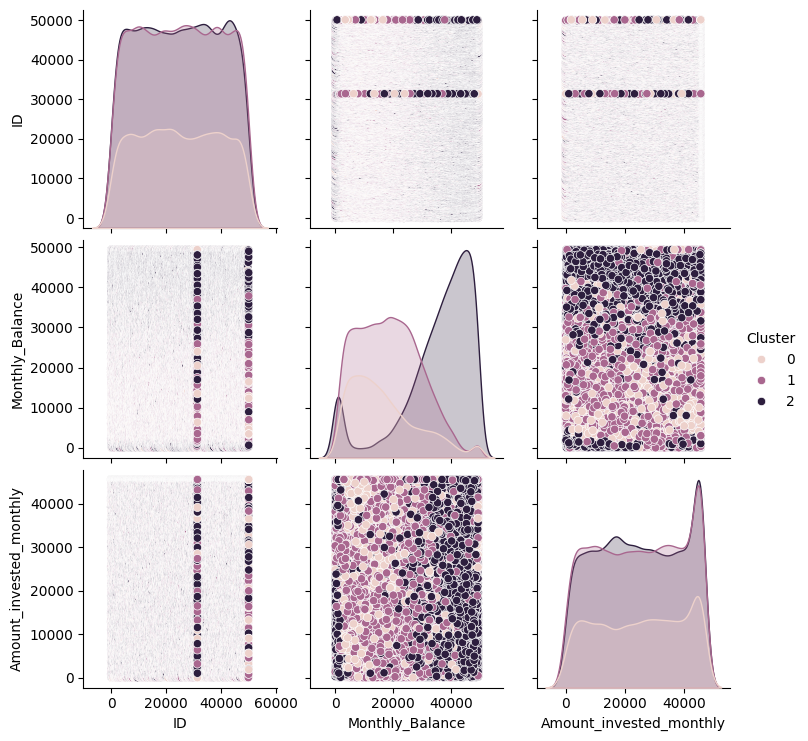

In [7]:

# Aplicação do K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar o cluster ao dataset
train_df['Cluster'] = clusters

# Visualizar a distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=train_df)
plt.title('Distribuição de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Análise das características médias de cada cluster
numeric_cols = train_df.select_dtypes(include=['number']).columns
cluster_profile = train_df[numeric_cols].groupby('Cluster').mean()
print(cluster_profile)

# Visualização em par de variáveis principais
selected_features = top_columns[:3]  # selecionar 3 variáveis mais relevantes para visualização
sns.pairplot(train_df, hue='Cluster', vars=selected_features)
plt.show()
